In [15]:
# Modeling
# import tensorflow as tf
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import load_model
# from sklearn.preprocessing import StandardScaler

# import xgboost as xgb

# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Attention, Layer, GRU, Input, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from math import sqrt
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import date, timedelta

# from cylib.apis.all_api import *

# Suppress the warning
# warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

# zscore = StandardScaler()

# Suppress the warning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
Main_bactest = True
path = 'D:\\AI_data_analysis\\CY\\'

In [16]:
MLP_factor_backtest = pd.read_csv(path + 'MLP_factor_backtest.csv',
                                 parse_dates=['trade_date'],
                                 index_col='trade_date')
GBDT_factor_backtest = pd.read_csv(path + 'GBDT_factor_backtest.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')
# GRU_factor_df = pd.read_csv(path + 'GRU_factor_df.csv',
#                             parse_dates=['trade_date'],
#                             index_col='trade_date')
AGRU_factor_backtest = pd.read_csv(path + 'AGRU_factor_backtest.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')
Ensemble_factor_df = pd.read_csv(path + 'Ensemble_weight_factor_df.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')

price_return_backtest = pd.read_csv(path + 'price_return_backtest.csv',
                                parse_dates=['trade_date'],
                                index_col='trade_date')
HS_300_backtest = pd.read_csv(path + 'HS_300_backtest.csv',
                          parse_dates=["trade_date"],
                          index_col="trade_date")
HS_300_backtest = HS_300_backtest['000300.SH']

CS_500_backtest = pd.read_csv(path + 'CS_500_backtest.csv',
                          parse_dates=["trade_date"],
                          index_col="trade_date")
CS_500_backtest = CS_500_backtest['000905.SH']

CS_1000_backtest = pd.read_csv(path + 'CS_1000_backtest.csv',
                           parse_dates=["trade_date"],
                           index_col="trade_date")
CS_1000_backtest = CS_1000_backtest['000852.SH']

In [17]:
GBDT_factor_backtest

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,603986.SH,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-01-06,-0.058439,0.057527,0.103791,-0.072426,0.076767,0.121416,-0.103317,-0.026384,0.006966,0.051971,...,0.146559,-0.045423,0.171528,0.164268,-0.085996,0.281839,0.082119,-0.091771,-0.021745,0.091907
2023-01-09,-0.098821,-0.025839,0.204812,-0.028474,-0.024481,-0.003739,0.382008,0.010386,-0.245229,-0.045049,...,-0.147143,0.064526,0.003031,-0.005572,0.019159,0.021182,-0.104345,0.057360,-0.007997,0.087781
2023-01-10,0.001900,-0.016773,0.136370,-0.129113,0.131915,0.077463,0.201366,0.046483,-0.100344,-0.005399,...,-0.114239,0.043422,0.131065,0.152405,0.150742,0.166821,-0.120246,0.046426,-0.015631,0.070522
2023-01-11,-0.028874,-0.048280,0.123735,-0.110028,0.057221,0.055501,-0.012290,-0.000795,-0.117465,0.001693,...,-0.051412,-0.004101,0.074363,-0.026551,0.201837,-0.234692,-0.112654,0.090151,0.029556,0.081148
2023-01-12,0.068821,0.063629,0.015085,-0.076799,0.039055,0.104246,0.029237,0.085886,-0.014917,0.030522,...,0.001604,0.050263,0.047604,0.020865,-0.015069,-0.032065,-0.042053,-0.022092,-0.038756,0.043865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,-0.033049,-0.128318,0.070612,-0.051592,-0.109900,-0.111717,-0.001497,0.155417,-0.134088,-0.011151,...,0.002666,-0.014219,0.073598,-0.043317,0.084324,-0.021370,-0.272874,0.043338,-0.066444,0.042588
2024-04-09,0.143510,0.047578,-0.027640,0.025713,0.045474,0.054759,0.094826,0.108148,-0.056610,0.160996,...,-0.042632,-0.015349,-0.060992,-0.066646,-0.100963,0.213773,-0.085406,0.147135,0.077578,0.021530
2024-04-10,-0.062790,-0.043031,0.143395,-0.199738,-0.150793,-0.059696,0.054453,0.048975,-0.057975,0.083676,...,-0.007629,0.122558,-0.231019,-0.049139,-0.056268,-0.015412,-0.149450,0.063820,0.048065,0.009263


In [18]:
def Layer_Backtest(factor_df, type):
    # layer number
    num_layers = 20

    # Calculte the ranks of factors daily.
    # ascending=False: High factor values are ranked first.
    factor_ranks = factor_df.rank(axis=1, ascending=False)

    # The factor ordering is divided into num_layers, each of which allocates funds equally.
    layer_allocation = (factor_ranks // (len(factor_df.columns) / num_layers)).fillna(0)

    # import matplotlib.cm as cm

    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.figure(figsize=(10, 5))
    plt.axhline(y=1, color='grey', linestyle='--')

    # Define a color map to use for changing colors progressively
    # colors = plt.cm.jet(np.linspace(0, 1, num_layers))

    global profit_long, profit_short
    profit_long = profit_short = None
    def Long_Short(Num_layers, Layer, Profit):
        global profit_long, profit_short
        long_layer = Num_layers - 1
        short_layer = 0
        if Layer == short_layer:
            profit_short = Profit
            # The short profit comes from the decline of the stock.
            profit_short = profit_short.apply(lambda x: x + 1 if x == 0 else -x + (1 - 0.0003))
            profit_short = profit_short.cumprod()
            profit_short *= 0.5
        elif Layer == long_layer:
            profit_long = Profit
            profit_long = profit_long.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
            profit_long = profit_long.cumprod()
            profit_long *= 0.5

    Long_position_df = None
    for layer in range(0, num_layers):
        # Ensure holding stocks
        hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
        hold_flag_matrix = hold_flag_matrix.shift(1)
        hold_flag_matrix.fillna(0, inplace=True)
        if layer == num_layers - 1:
            Long_position_df = hold_flag_matrix.copy()

        # Calculate the sum of each line in turn.
        stock_amount_sum = hold_flag_matrix.sum(axis=1)

        # Calculate the weight of each stock. (Average distribution at the same level)
        weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)

        # Calculate the daily profit rate. And prepare to calculate cumprod.
        profit = (weight_allocation * price_return_backtest).sum(axis=1)

        # Create Long and Short position
        Long_Short(num_layers, layer, profit)

        # Calculate the daily equity and draw.
        # Using the 'viridis' colormap with a gradient based on layer number
        colors = cm.viridis(layer / num_layers)
        profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
        profit.cumprod().plot(label=layer, legend=True, color=colors)

    profit_HS300 = HS_300_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_HS300.cumprod().plot(label="HS 300 index", legend=True, color='r')
    profit_CS500 = CS_500_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS500.cumprod().plot(label="CS 500 index", legend=True, color='g')
    profit_CS1000 = CS_1000_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS1000.cumprod().plot(label="CS 1000 index", legend=True, color='b')

    (profit_long + profit_short).plot(color='orange', label='long_short', legend=True)
    plt.title(f"20-Layered Portfolio Equity ({type})")
    plt.legend(title='Layer', bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

    return profit_long, Long_position_df

In [19]:
def Backtest_Indexes(factor_df, Profit_Long):
    # ICIR
    IC_series = factor_df.corrwith(price_return_backtest, 
                                   axis=1,
                                   method='spearman')
    IC_mean = IC_series.mean()
    print(f'IC mean: {IC_mean}')
    ICIR = IC_series.mean() / IC_series.std()
    print(f"ICIR: {ICIR}")
    IC_series.hist(bins=30)

    # IC winning rate
    IC_winning_rate = sum(1 for ic in IC_series if ic > 0) / len(IC_series)
    print(f"IC winning rate: {IC_winning_rate}")

    t_value = ICIR / sqrt(len(IC_series))
    print(f"IC t-value: {t_value}")

    # Long (Except Short), so `profit_long * 2`
    # profit_long is long equity series.
    Long_equity = Profit_Long * 2
    Long_ROI = (Long_equity[-1]) - 1
    print(f"Long ROI: {Long_ROI}")

    # Max Drawdown
    # Calculate the previous peaks
    previous_peaks = Long_equity.cummax()
    # Calculate the drawdowns
    drawdowns = (Long_equity - previous_peaks) / previous_peaks

    # Find the maximum drawdown and the dates associated with it
    # Convert the index labels to a numeric format
    drawdowns.index = pd.to_numeric(drawdowns.index)
    max_drawdown = drawdowns.min()
    print(f'Max drawdown: {max_drawdown}')
    max_drawdown_start = drawdowns.idxmin()

    # Convert the start and end dates back to the original format if needed
    max_drawdown_start = pd.to_datetime(max_drawdown_start).date()
    print(f"Max drawdown begin date: {max_drawdown_start}")

In [20]:
def Simple_Backtest(factor_df, stock_num):
    # Calculte the ranks of factors daily.
    factor_ranks = factor_df.rank(axis=1, ascending=True)
    
    # Create position_df based on top 3 ranks
    position_df = factor_ranks.apply(lambda x: x <= stock_num).astype(int)

    # Calculate the sum of each line in turn.
    stock_amount_sum = position_df.sum(axis=1)

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = position_df.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)
    hold_flag_matrix = hold_flag_matrix.shift(1)
    hold_flag_matrix.fillna(0, inplace=True)
    
    # Calculate the daily profit rate. And prepare to calculate cumprod.
    profit = (weight_allocation * price_return_backtest).sum(axis=1)

    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.figure(figsize=(10, 5))
    plt.axhline(y=1, color='grey', linestyle='--')
    # Calculate the daily equity and draw.
    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit.cumprod().plot(label='Stocks', legend=True, color='#800080')

    profit_HS300 = HS_300_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_HS300.cumprod().plot(label="HS 300 index", legend=True, color='r')
    profit_CS500 = CS_500_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS500.cumprod().plot(label="CS 500 index", legend=True, color='g')
    profit_CS1000 = CS_1000_backtest.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS1000.cumprod().plot(label="CS 1000 index", legend=True, color='b')

    plt.title(f"Equity of {stock_num} stocks")
    plt.legend(title='Index', bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

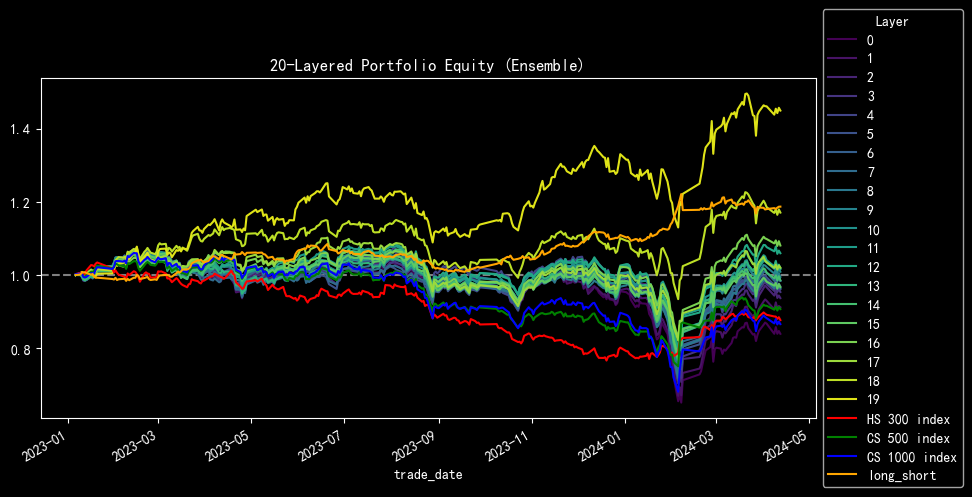

In [21]:
profit_long_Ensemble, Long_position_df_Ensemble = Layer_Backtest(Ensemble_factor_df, 'Ensemble')

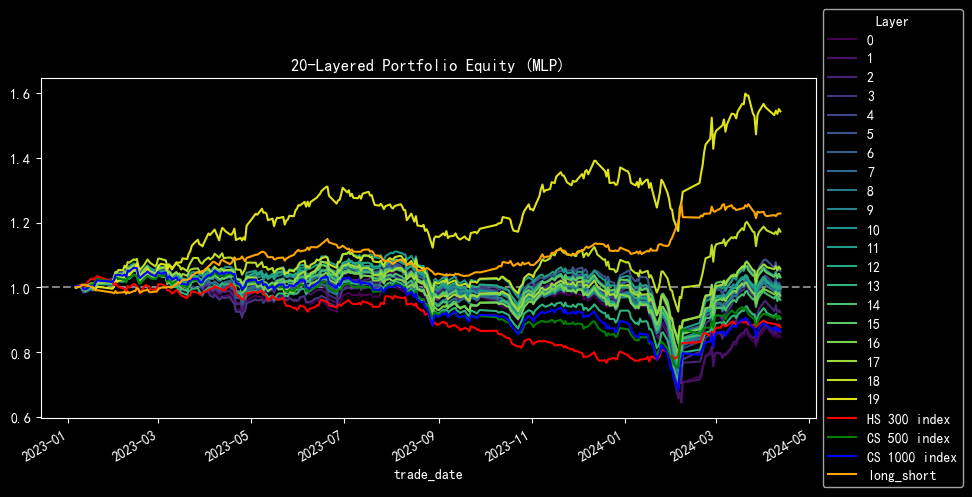

In [22]:
profit_long_MLP, Long_position_df_MLP = Layer_Backtest(MLP_factor_backtest, 'MLP')

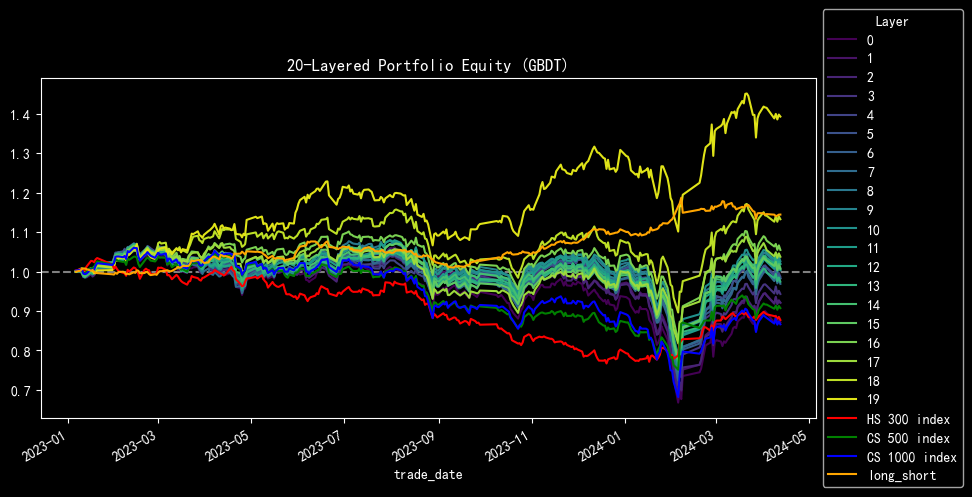

In [23]:
profit_long_GBDT, Long_position_df_GBDT = Layer_Backtest(GBDT_factor_backtest, 'GBDT')

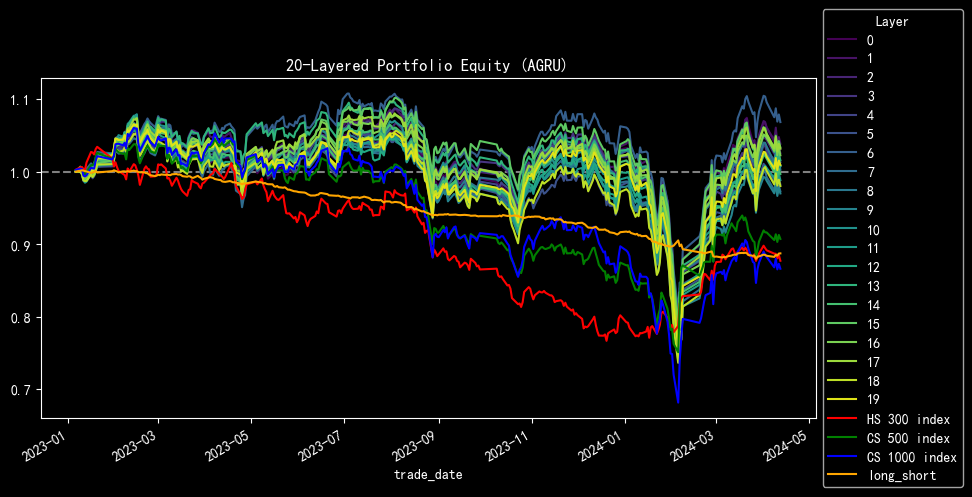

In [24]:
profit_long_AGRU, Long_position_df_AGRU = Layer_Backtest(AGRU_factor_backtest, 'AGRU')

IC mean: -0.08554548011916312
ICIR: -0.6201646946748582
IC winning rate: 0.25245901639344265
IC t-value: -0.03551052711710925
Long ROI: 0.5433577305302164
Max drawdown: -0.15622990819052218
Max drawdown begin date: 2024-02-05


C:\Users\HH\AppData\Local\Temp\ipykernel_5848\3672690208.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Long_ROI = (Long_equity[-1]) - 1


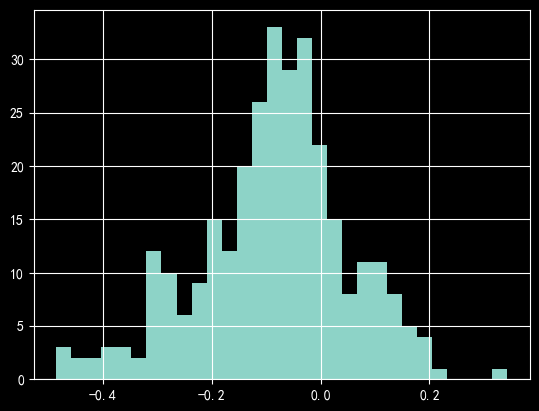

In [25]:
Backtest_Indexes(MLP_factor_backtest, profit_long_MLP)

IC mean: -0.0685940942593318
ICIR: -0.7931151259538384
IC winning rate: 0.20327868852459016
IC t-value: -0.04541364000403017
Long ROI: 0.3935853989221332
Max drawdown: -0.16377561378590919
Max drawdown begin date: 2024-02-05


C:\Users\HH\AppData\Local\Temp\ipykernel_5848\3672690208.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Long_ROI = (Long_equity[-1]) - 1


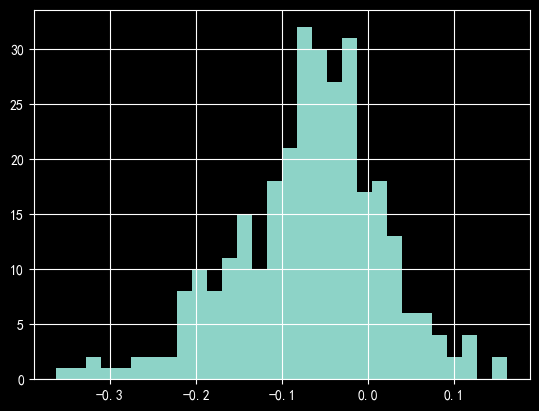

In [26]:
Backtest_Indexes(GBDT_factor_backtest, profit_long_GBDT)

IC mean: -0.0009273578647725205
ICIR: -0.05233295226314831
IC winning rate: 0.46885245901639344
IC t-value: -0.0029965761295605905
Long ROI: 0.008981200927140831
Max drawdown: -0.2873996216911038
Max drawdown begin date: 2024-02-05


C:\Users\HH\AppData\Local\Temp\ipykernel_5848\3672690208.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Long_ROI = (Long_equity[-1]) - 1


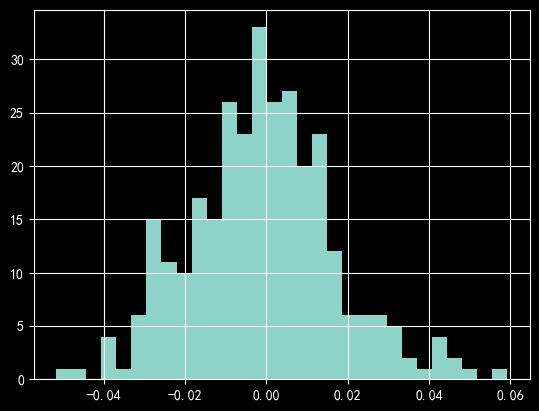

In [27]:
Backtest_Indexes(AGRU_factor_backtest, profit_long_AGRU)

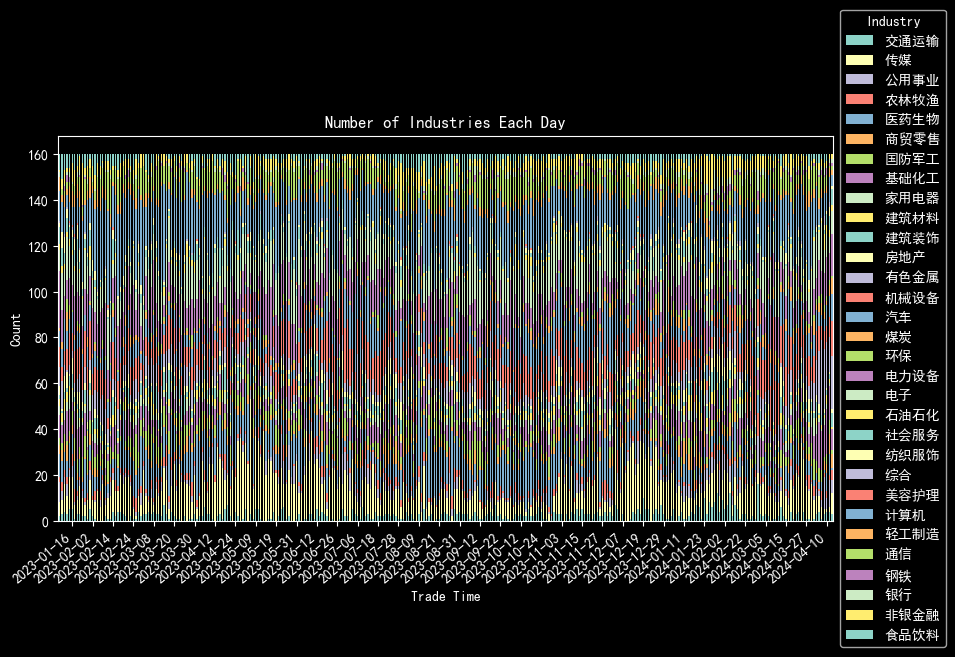

In [28]:
from Position_Industry_Daily import Draw_Industry_Daily
industry_counts = Draw_Industry_Daily(Long_position_df_Ensemble)